## JSON Excercises

### Excercise 1: Find the 10 countries with most projects

In [665]:
# import the necessary packages

import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [666]:
# Read the JSON file as a text
data = json.load((open('data/world_bank_projects.json')))

In [667]:
# create a pandas dataframe by normalizing the json file and selecting the necessary columns
df = json_normalize(data, 'sector',['countryshortname','totalcommamt','status'])

In [668]:
# filter for projects that are active and groupby by country name
# use agg method to count the number of projects and sum of the total commitment
df1 = (df[df['status'] == 'Active'].
       groupby('countryshortname').agg({'Name':'count','totalcommamt':'sum'}))

In [669]:
# change the names of the columns to be more readable
df1.columns=['Number of projects','Total commitment']

In [670]:
# sort the values from large to small and select the top 10 values
df1 = df1.sort_values('Number of projects', ascending=False)
result1 = df1.head(10)

In [671]:
result1

,Number of projects,Total commitment
countryshortname,,
China,54,5185400000
Indonesia,43,6321940000
India,43,7008700000
Vietnam,40,4792280000
Africa,33,2993020000
Bangladesh,32,5317840000
Nepal,31,1404180000
"Yemen, Republic of",27,927760000
Burkina Faso,26,1057900000


Text(0.5,0,'')

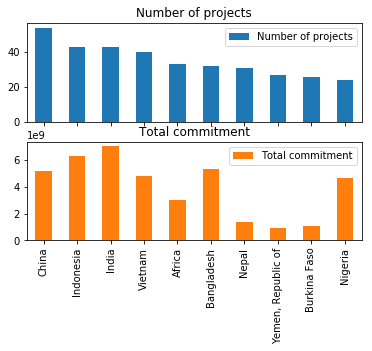

In [672]:
# result1.plot.scatter(x='Number of projects', y='Total commitment')
result1[['Number of projects','Total commitment']].plot.bar(subplots=True)
plt.xlabel('')

### Excercise 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

In [673]:
# normalize the mjsector_namecode column, groupby 'name' column and aggregate by count.
df2 = json_normalize(data, 'mjtheme_namecode')
result2 = df2.groupby('name').count().sort_values('code', ascending=False)
result2.columns = ['number']

In [674]:
result2 = result2.head(10)

Text(0,0.5,'Numer of project themes')

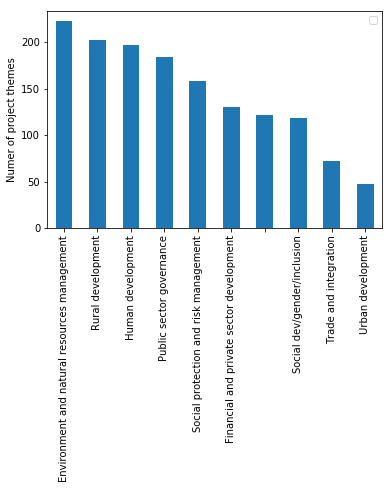

In [675]:
result2.plot.bar()
plt.legend('')
plt.xlabel('')
plt.ylabel('Numer of project themes')

### Excercise 3:  

### In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [791]:
# load the dataframe with teh major theme column using json_normalize
df3 = json_normalize(data,'mjtheme_namecode')

In [794]:
# isolate the name column
name = df3.name

In [795]:
# assign NaN values to the blank rows of the name column and reassign the name column to df3
name[name==''] = np.NAN
df3.name = name

In [798]:
df3.head()

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [839]:
# create a dictionary of code:theme pairs to fill the na in the next step
dic = df3.dropna().set_index('code').to_dict()['name']
dic

{'8': 'Human development',
 '11': 'Environment and natural resources management',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [838]:
# fill the df3 dataframe with values from the dictionary using the code column as keys
df3['name'] = df3['name'].fillna(df3['code'].map(dic))
df3.head()

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


Text(0,0.5,'Number of projects')

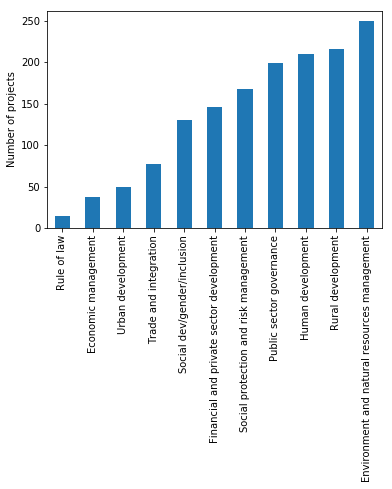

In [837]:
# visualize the new filled dataframe
ax = df3.groupby(['name']).count().sort_values('code').plot(kind='bar')
ax.get_legend().remove()
ax.set_xlabel('')
ax.set_ylabel('Number of projects')